In [1]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui (mac not supported)

Text(0.5, 1.0, 'Histogram of Equalized Wartime Image')

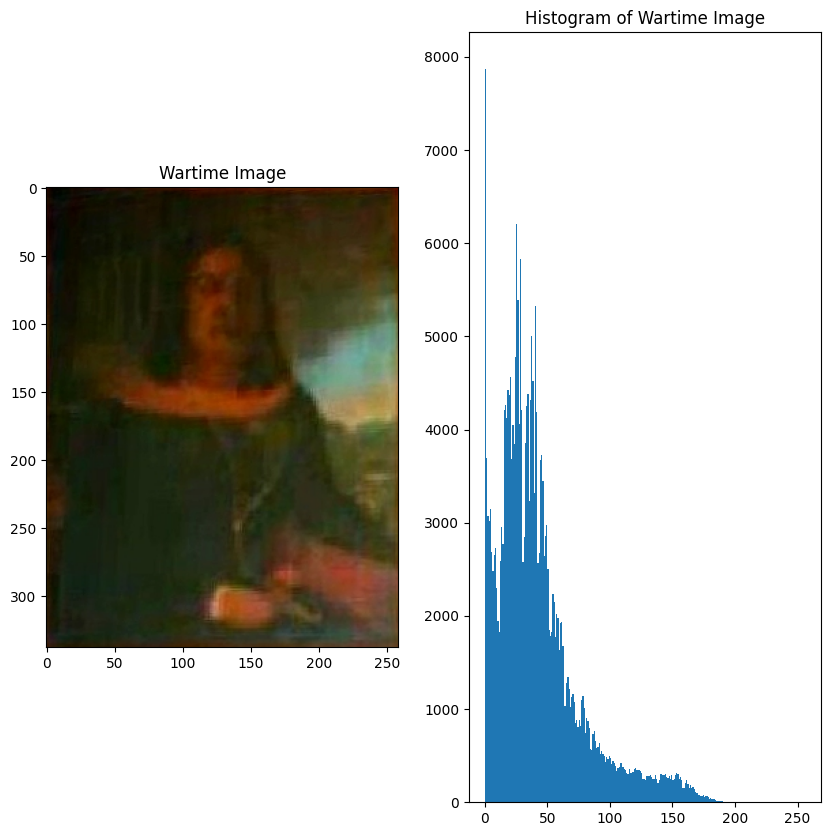

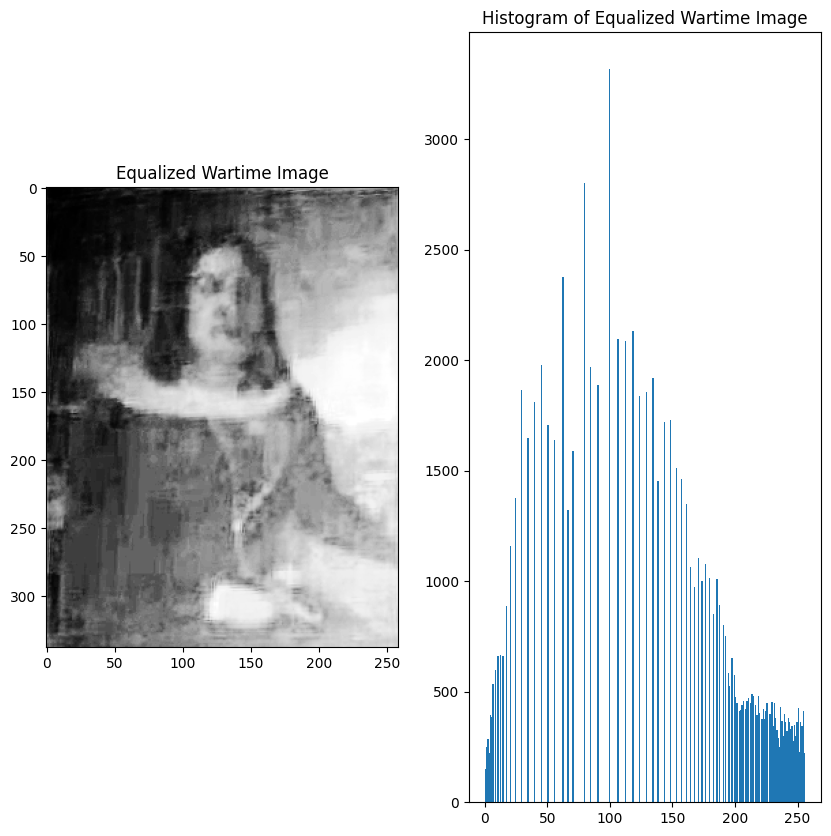

In [19]:
I = cv2.imread("../Images/Julia_Alapai_(poor_quality).jpg")


Values = I.ravel()
# plt.hist(Values, bins=256, range=[0,256])
# plt.show()

I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Wartime Image')
plt.subplot(122)
plt.hist(Values, bins=256, range=[0,256])
plt.title('Histogram of Wartime Image')


# Equalize histogram
I_eq = cv2.equalizeHist(I_gray)
Values_eq = I_eq.ravel()

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(I_eq, cmap='gray')
plt.title('Equalized Wartime Image')
plt.subplot(122)
plt.hist(Values_eq, bins=256, range=[0,256])
plt.title('Histogram of Equalized Wartime Image')


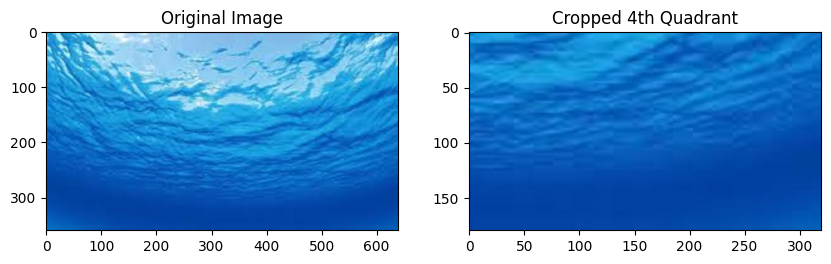

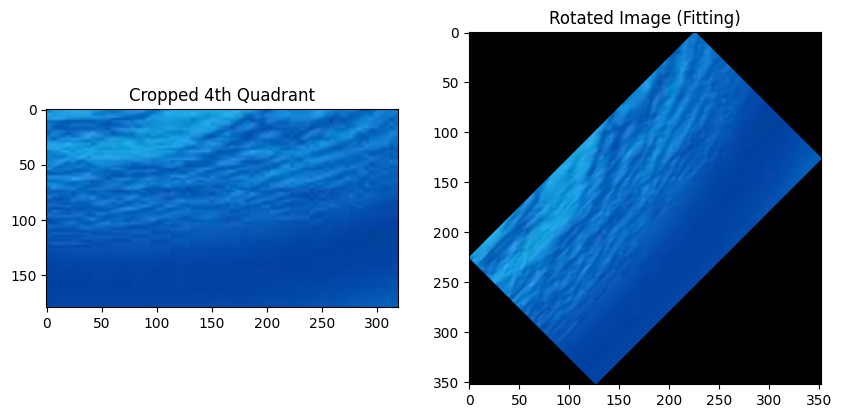

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
I = cv2.imread("../Images/water.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image
height, width, _ = I.shape

# Crop the 4th quadrant
x1 = int(width / 2)  # x-coordinate of top-left corner
y1 = int(height / 2)  # y-coordinate of top-left corner
x2 = width
y2 = height

I_crop = I[y1:y2, x1:x2]

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(I)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(I_crop)
plt.title('Cropped 4th Quadrant')

# Compute the center of the cropped image
center_x, center_y = (x2 - x1) // 2, (y2 - y1) // 2

# Rotation angle
angle = 45

# Compute the new bounding box size after rotation
cos_angle = np.abs(np.cos(np.radians(angle)))
sin_angle = np.abs(np.sin(np.radians(angle)))
new_width = int((y2 - y1) * sin_angle + (x2 - x1) * cos_angle)
new_height = int((y2 - y1) * cos_angle + (x2 - x1) * sin_angle)

# Adjust the rotation matrix for the new size
M = cv2.getRotationMatrix2D((center_x, center_y), angle, 1)

# Update the translation part of the matrix to move the rotated image to the center
M[0, 2] += (new_width - (x2 - x1)) / 2
M[1, 2] += (new_height - (y2 - y1)) / 2

# Perform the rotation with the updated matrix and new canvas size
I_rotate = cv2.warpAffine(I_crop, M, (new_width, new_height))

# Plot the results
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(I_crop)
plt.title('Cropped 4th Quadrant')
plt.subplot(122)
plt.imshow(I_rotate)
plt.title('Rotated Image (Fitting)')
plt.show()


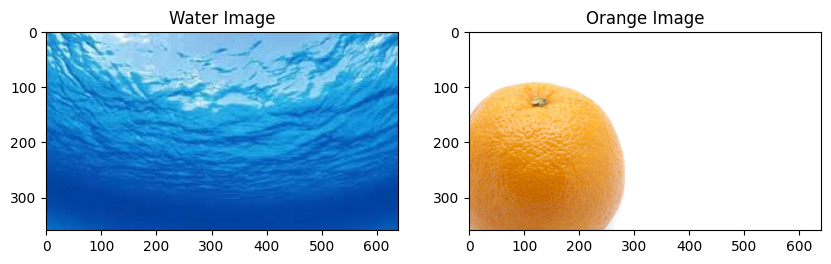

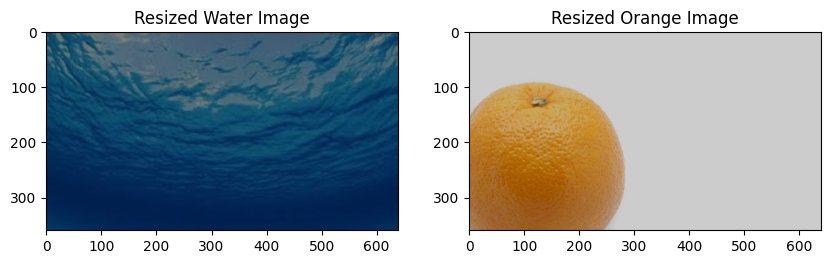

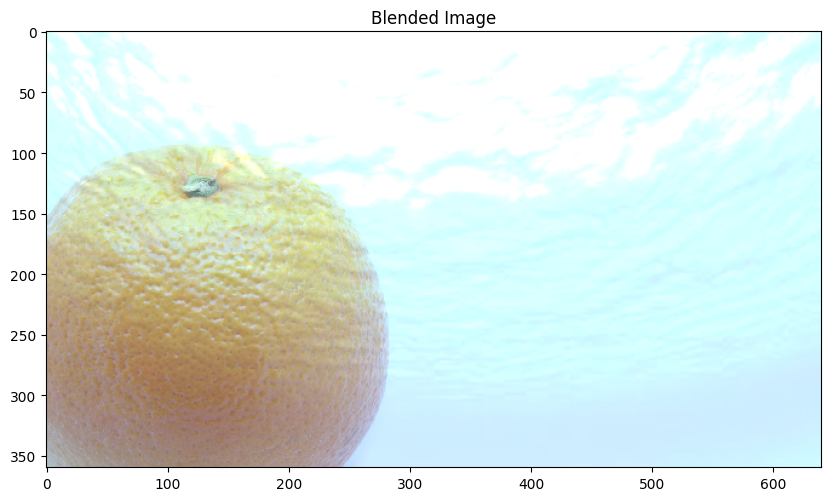

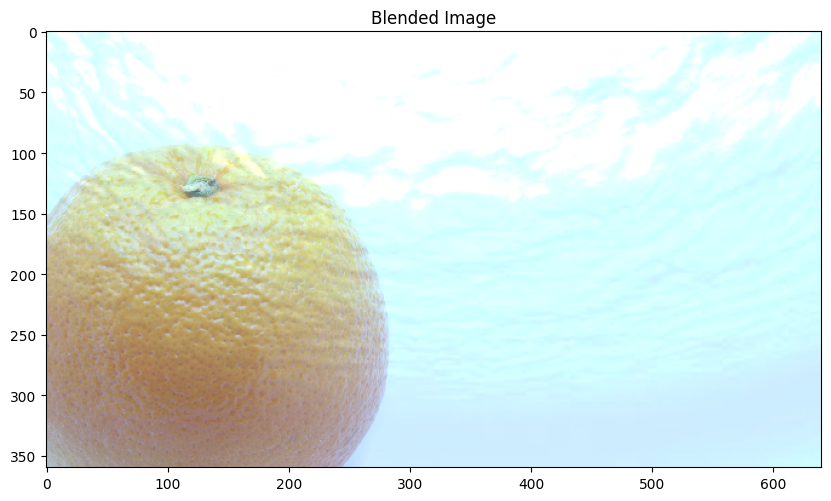

In [2]:
water = cv2.imread("../Images/water.jpg")
orange = cv2.imread("../Images/orange.png")

water = cv2.cvtColor(water, cv2.COLOR_BGR2RGB)
orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(water)
plt.title('Water Image')
plt.subplot(122)
plt.imshow(orange)
plt.title('Orange Image')

# Multiply the images by 0.5
water_resized = cv2.multiply(water, 0.5)
orange_resized = cv2.multiply(orange, 0.8)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(water_resized)
plt.title('Resized Water Image')
plt.subplot(122)
plt.imshow(orange_resized)
plt.title('Resized Orange Image')

# Add the images together
result = cv2.add(water_resized, orange_resized)

plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.title('Blended Image')
plt.show()


# Use the addWeighted function to blend the images
result = cv2.addWeighted(water, 0.5, orange, 0.8, 0)

plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.title('Blended Image')
plt.show()


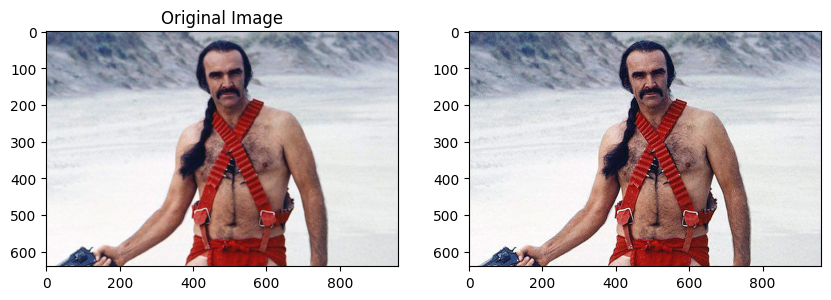

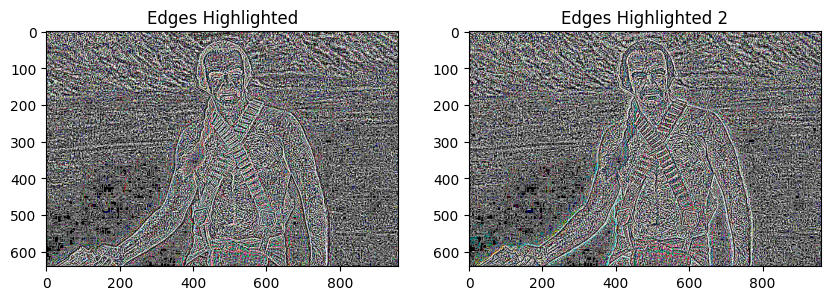

In [8]:
I = cv2.imread("../Images/Zardoz.jpg")

# Build a kernel for sharpening an image
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Apply the kernel to the image
I_sharp = cv2.filter2D(I, -1, kernel)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(cv2.cvtColor(I_sharp, cv2.COLOR_BGR2RGB))


# Subtract the sharpened image from the original image to highlight the edges
I_edges = I_sharp - I
I_edges_2 = I - I_sharp

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(I_edges, cv2.COLOR_BGR2RGB))
plt.title('Edges Highlighted')
plt.subplot(122)
plt.imshow(cv2.cvtColor(I_edges_2, cv2.COLOR_BGR2RGB))
plt.title('Edges Highlighted 2')
plt.show()


